# FastText Classifier

## Training the Model

In [1]:
# using the gpu
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
# loading the movie dataset
from google.colab import files
movies = files.upload()

Saving movies.csv to movies.csv


In [3]:
# creating pandas dataframe
import pandas as pd
col_names = ["genre", "split"]
data = pd.read_csv("movies.csv", sep=";", names=col_names)
data = data.sample(frac=1, random_state=42)
data.head()

,genre,split
8826,superhero,"ruling, brother. a throne would suit you ill. ..."
3172,comedy,the hotel. you'd better go straight to the bas...
9221,western,"shooting a man, son. no, it isn't. not in my o..."
718,action,that. we've only got seven minutes. passengers...
3133,comedy,the thames men later became spinal tap and had...


In [4]:
# remove empty lines
data.dropna(inplace=True)

In [5]:
data.genre.unique()

array(['superhero', 'comedy', 'western', 'action', 'fantasy', 'history',
       'adventure', 'sport', 'drama', 'scifi'], dtype=object)

In [6]:
# When you train a fasttext model, it expects labels to be specified with label
# prefix. We will just create a third column in the dataframe that has label as
# well as the subtitle split.
data['genre'] = '__label__' + data['genre'].astype(str)
data.head()

,genre,split
8826,__label__superhero,"ruling, brother. a throne would suit you ill. ..."
3172,__label__comedy,the hotel. you'd better go straight to the bas...
9221,__label__western,"shooting a man, son. no, it isn't. not in my o..."
718,__label__action,that. we've only got seven minutes. passengers...
3133,__label__comedy,the thames men later became spinal tap and had...


In [7]:
data['genre_split'] = data['genre'] + ' ' + data['split']
data.head()

,genre,split,genre_split
8826,__label__superhero,"ruling, brother. a throne would suit you ill. ...","__label__superhero ruling, brother. a throne w..."
3172,__label__comedy,the hotel. you'd better go straight to the bas...,__label__comedy the hotel. you'd better go str...
9221,__label__western,"shooting a man, son. no, it isn't. not in my o...","__label__western shooting a man, son. no, it i..."
718,__label__action,that. we've only got seven minutes. passengers...,__label__action that. we've only got seven min...
3133,__label__comedy,the thames men later became spinal tap and had...,__label__comedy the thames men later became sp...


In [8]:
import re

# Preprocessing of the text: remove punctuation, remove extra space, make the
# entire sentence lower case
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower()

In [9]:
data['genre_split'] = data['genre_split'].map(preprocess)
data.head()

,genre,split,genre_split
8826,__label__superhero,"ruling, brother. a throne would suit you ill. ...",__label__superhero ruling brother a throne wou...
3172,__label__comedy,the hotel. you'd better go straight to the bas...,__label__comedy the hotel you'd better go stra...
9221,__label__western,"shooting a man, son. no, it isn't. not in my o...",__label__western shooting a man son no it isn'...
718,__label__action,that. we've only got seven minutes. passengers...,__label__action that we've only got seven minu...
3133,__label__comedy,the thames men later became spinal tap and had...,__label__comedy the thames men later became sp...


In [10]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [11]:
train.shape, test.shape

((8131, 3), (2033, 3))

In [12]:
# Is the train data balanced?
train.genre.value_counts()

__label__comedy       967
__label__superhero    809
__label__scifi        809
__label__adventure    806
__label__history      806
__label__drama        798
__label__fantasy      794
__label__sport        787
__label__action       780
__label__western      775
Name: genre, dtype: int64

<Axes: ylabel='genre'>

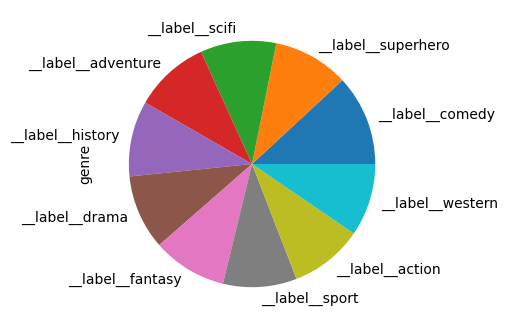

In [13]:
train.genre.value_counts().plot(kind="pie", figsize=(4,4))

In [14]:
# Is the test data balanced?
test.genre.value_counts()

__label__comedy       228
__label__western      219
__label__action       215
__label__sport        213
__label__fantasy      200
__label__drama        199
__label__history      192
__label__superhero    190
__label__scifi        189
__label__adventure    188
Name: genre, dtype: int64

<Axes: ylabel='genre'>

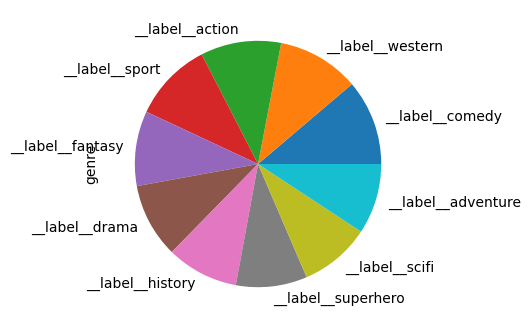

In [15]:
test.genre.value_counts().plot(kind="pie", figsize=(4,4))

In [16]:
# Saving the training and test set to csv.-files
train.to_csv("movies.train", columns=["genre_split"], index=False, header=False)
test.to_csv("movies.test", columns=["genre_split"], index=False, header=False)

In [17]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=e78243ea4e8d770913fd054391331d4a53bd79e1d76f52338e2c446edadb3231
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [18]:
import fasttext

# Which number of epochs is the best? - 40 --> 0.7583661417322834 (precision)
#                                          --> 0.7583661417322834 (recall)
for i in range(5,45):
  model = fasttext.train_supervised(input="movies.train", lr=1.0, epoch=i)
  print(f"Epoch: {str(i)} " + str(model.test("movies.test")))

Epoch: 5 (2032, 0.7357283464566929, 0.7357283464566929)
Epoch: 6 (2032, 0.7485236220472441, 0.7485236220472441)
Epoch: 7 (2032, 0.750492125984252, 0.750492125984252)
Epoch: 8 (2032, 0.7480314960629921, 0.7480314960629921)
Epoch: 9 (2032, 0.7490157480314961, 0.7490157480314961)
Epoch: 10 (2032, 0.7485236220472441, 0.7485236220472441)
Epoch: 11 (2032, 0.749507874015748, 0.749507874015748)
Epoch: 12 (2032, 0.749507874015748, 0.749507874015748)
Epoch: 13 (2032, 0.749507874015748, 0.749507874015748)
Epoch: 14 (2032, 0.7475393700787402, 0.7475393700787402)
Epoch: 15 (2032, 0.75, 0.75)
Epoch: 16 (2032, 0.7514763779527559, 0.7514763779527559)
Epoch: 17 (2032, 0.7524606299212598, 0.7524606299212598)
Epoch: 18 (2032, 0.7539370078740157, 0.7539370078740157)
Epoch: 19 (2032, 0.75, 0.75)
Epoch: 20 (2032, 0.7509842519685039, 0.7509842519685039)
Epoch: 21 (2032, 0.7485236220472441, 0.7485236220472441)
Epoch: 22 (2032, 0.7450787401574803, 0.7450787401574803)
Epoch: 23 (2032, 0.7485236220472441, 0.7485

In [19]:
!pip install numpy

In [20]:
import numpy as np

# Which learning rate is the best? - 0.4 --> 0.7623031496062992 (precision)
#                                        --> 0.7623031496062992 (recall)
for j in np.arange(0.0,1.05,0.05):
  model = fasttext.train_supervised(input="movies.train", lr=j, epoch=40)
  print(f"Learning rate: {str(j)} " + str(model.test("movies.test")))

Learning rate: 0.0 (2032, 0.1077755905511811, 0.1077755905511811)
Learning rate: 0.05 (2032, 0.6171259842519685, 0.6171259842519685)
Learning rate: 0.1 (2032, 0.7490157480314961, 0.7490157480314961)
Learning rate: 0.15000000000000002 (2032, 0.7514763779527559, 0.7514763779527559)
Learning rate: 0.2 (2032, 0.7563976377952756, 0.7563976377952756)
Learning rate: 0.25 (2032, 0.7554133858267716, 0.7554133858267716)
Learning rate: 0.30000000000000004 (2032, 0.7598425196850394, 0.7598425196850394)
Learning rate: 0.35000000000000003 (2032, 0.7608267716535433, 0.7608267716535433)
Learning rate: 0.4 (2032, 0.7623031496062992, 0.7623031496062992)
Learning rate: 0.45 (2032, 0.7598425196850394, 0.7598425196850394)
Learning rate: 0.5 (2032, 0.7593503937007874, 0.7593503937007874)
Learning rate: 0.55 (2032, 0.7583661417322834, 0.7583661417322834)
Learning rate: 0.6000000000000001 (2032, 0.7578740157480315, 0.7578740157480315)
Learning rate: 0.65 (2032, 0.7583661417322834, 0.7583661417322834)
Learning

In [21]:
# Which n-gram size is the best? - Unigram --> 0.7623031496062992 (precision)
#                                          --> 0.7623031496062992 (recall)
for k in range(1,6):
  model = fasttext.train_supervised(input="movies.train", lr=0.4, epoch=40, wordNgrams=k)
  print(f"n-gram: {str(k)} " + str(model.test("movies.test")))

n-gram: 1 (2032, 0.7623031496062992, 0.7623031496062992)
n-gram: 2 (2032, 0.6914370078740157, 0.6914370078740157)
n-gram: 3 (2032, 0.6525590551181102, 0.6525590551181102)
n-gram: 4 (2032, 0.6210629921259843, 0.6210629921259843)
n-gram: 5 (2032, 0.6018700787401575, 0.6018700787401575)


In [22]:
# Train the best model
model = fasttext.train_supervised(input="movies.train", lr=0.4, epoch=40, wordNgrams=1)
model.test("movies.test")

(2032, 0.7623031496062992, 0.7623031496062992)

## Testing the Model

### Showtime (2002)

In [23]:
# loading the test dataset (Showtime)
test1 = files.upload()

Saving showtime.csv to showtime.csv


In [24]:
# create a pandas dataframe from the test data
col_names = ["genre", "split"]
test1_data = pd.read_csv("showtime.csv", sep=";", names=col_names)
test1_data["split"] = test1_data['split'].map(preprocess)
test1_data.head()

,genre,split
0,action,being a policeman is not what you see on tv i'...
1,action,hunt you down and put you behind bars i won't ...
2,action,rights you should've called for backup my only...
3,action,gonna miss him i'll need your gun and your shi...
4,action,restroom on the left don't give up the day job...


In [25]:
# predict the genre of the splits
predictions1 = []

for i in range(len(test1_data["split"])):
    prediction1 = model.predict(test1_data["split"][i])
    prediction1 = prediction1[0][0].replace("__label__","")
    predictions1.append(prediction1)

In [26]:
# the movie is a action comedy so the two most frequent labels should be "action" & "comedy"
from collections import Counter

counter1 = Counter(predictions1)
most_frequent1 = counter1.most_common(10)

print(most_frequent1)

[('drama', 31), ('comedy', 18), ('action', 13), ('scifi', 12), ('superhero', 8), ('western', 7), ('history', 6), ('sport', 4), ('adventure', 1)]


### The Equalizer 3 (2023)

In [27]:
# loading the test dataset (The Equalizer 3)
test2 = files.upload()

Saving equalizer.csv to equalizer.csv


In [28]:
# create a pandas dataframe from the test data
test_data2 = pd.read_csv("equalizer.csv", sep=";", names=col_names)
test_data2 = test_data2.dropna()
test_data2["split"] = test_data2['split'].map(preprocess)
test_data2.head()

,genre,split
0,action,wait here he told me to wait outside let's go ...
1,action,for you you know who i am then i know what you...
2,action,are except you're a few meters short of what y...
3,action,dead already he just doesn't know it yet i fee...
4,action,very low he wouldn't have made it to the hospi...


In [29]:
# predict the genre of the splits
predictions2 = []

for i in range(len(test_data2["split"])):
    prediction2 = model.predict(test_data2["split"][i])
    prediction2 = prediction2[0][0].replace("__label__","")
    predictions2.append(prediction2)

In [30]:
# the movie is a action drama so the two most frequent labels should be "action" & "drama"
counter2 = Counter(predictions2)
most_frequent2 = counter2.most_common(10)

print(most_frequent2)

[('action', 24), ('drama', 14), ('western', 14), ('adventure', 13), ('superhero', 11), ('comedy', 11), ('fantasy', 7), ('scifi', 3), ('history', 1), ('sport', 1)]


## Saving the Model

In [31]:
# Saving the best model
model.save_model("model_movies.bin")

In [32]:
# Loading the model
model = fasttext.load_model("model_movies.bin")

In [33]:
model.predict("being a policeman is not what you see on tv")

(('__label__western',), array([0.71876627]))

In [34]:
model.predict("same gun that put holes in your tv repair shop it appears to be hand-held automatic with interchangeable magazines")

(('__label__action',), array([0.59073186]))

In [35]:
model.predict("you try out for the village people")

(('__label__action',), array([0.80692506]))

In [45]:
# Create dataset ignoring the index of the test dataset to create confusion matrix on test data
test_ignore = pd.concat([test], ignore_index = True)

for i in range(len(test_ignore)):
  text = re.sub(r'\n',' ', test_ignore["split"][i])
  test_ignore["split"][i] = text

In [46]:
test_ignore

,genre,split,genre_split
0,__label__superhero,a job when you have a record. i'm sure you'll ...,__label__superhero a job when you have a recor...
1,__label__action,a bottle to take home by the end of the night....,__label__action a bottle to take home by the e...
2,__label__adventure,because of me. i knew the germans would hire y...,__label__adventure because of me i knew the ge...
3,__label__adventure,always surrounded it. it is not of this earth....,__label__adventure always surrounded it it is ...
4,__label__adventure,"afraid it does. oh, my god! all your majesty h...",__label__adventure afraid it does oh my god al...
...,...,...,...
2028,__label__comedy,the day you die! - huh? - what? huh? what? l- ...,__label__comedy the day you die huh what huh w...
2029,__label__drama,"- hey, thanks for the beer. - yeah, man. i sho...",__label__drama hey thanks for the beer yeah ma...
2030,__label__superhero,way. coming. where do you think she's going? d...,__label__superhero way coming where do you thi...
2031,__label__fantasy,i devote my life to you. - mmm-hmm. whatever y...,__label__fantasy i devote my life to you mmm h...


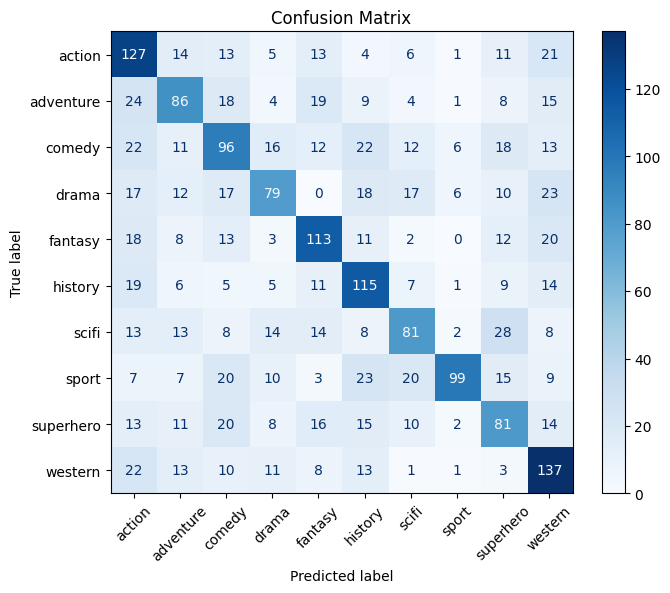

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [test_ignore["genre"][i].replace("__label__","") for i in range(len(test_ignore))]
y_pred = [model.predict(test_ignore["split"][i])[0][0].replace("__label__","") for i in range(len(test_ignore))]

fig, ax = plt.subplots(figsize=(7.5, 6))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["action", "adventure", "comedy", "drama", "fantasy", "history", "scifi", "sport", "superhero", "western"])
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)

plt.title('Confusion Matrix')
plt.show()